In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# --- mnistデータを読み込む ---
np.random.seed(20201225)
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
images, labels = mnist.train.next_batch(10)
print(len(images[0])) # 784 * 784のグレースケール画像，0以上1以下
print(labels[0]) # one-hot表現，先頭の要素から0, 1, ...

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
784
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


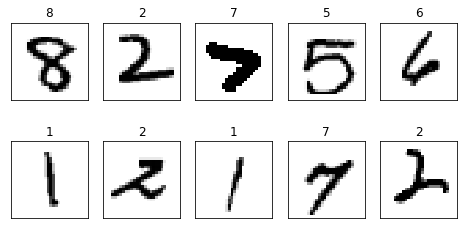

In [3]:
# 画像を表示してみる
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%np.argmax(label))
    subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")

In [4]:
# --- tensorflowで学習するための領域確保 ---
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0 # ブロードキャストルール
p = tf.nn.softmax(f) # ブロードキャストルール

In [5]:
# --- 損失関数を定義 ---
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [6]:
# 正解率
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
# --- パラメータの最適化 ---
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if (i % 100 == 0):
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f'% (i, loss_val, acc_val))

c:\users\fukumoto\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 100, Loss: 7529.379883, Accuracy: 0.849100
Step: 200, Loss: 5364.417969, Accuracy: 0.879400
Step: 300, Loss: 4522.556641, Accuracy: 0.891600
Step: 400, Loss: 4062.890137, Accuracy: 0.899200
Step: 500, Loss: 3781.245117, Accuracy: 0.902500
Step: 600, Loss: 3592.481689, Accuracy: 0.906600
Step: 700, Loss: 3463.279785, Accuracy: 0.907800
Step: 800, Loss: 3338.646484, Accuracy: 0.911200
Step: 900, Loss: 3246.824463, Accuracy: 0.914000
Step: 1000, Loss: 3186.166504, Accuracy: 0.914100
Step: 1100, Loss: 3122.159180, Accuracy: 0.914000
Step: 1200, Loss: 3090.538086, Accuracy: 0.914600
Step: 1300, Loss: 3022.092285, Accuracy: 0.918000
Step: 1400, Loss: 3004.397461, Accuracy: 0.916400
Step: 1500, Loss: 2952.379395, Accuracy: 0.918200
Step: 1600, Loss: 2921.930664, Accuracy: 0.920000
Step: 1700, Loss: 2905.839844, Accuracy: 0.919700
Step: 1800, Loss: 2902.284424, Accuracy: 0.918600
Step: 1900, Loss: 2849.199707, Accuracy: 0.921300
Step: 2000, Loss: 2834.854980, Accuracy: 0.922100


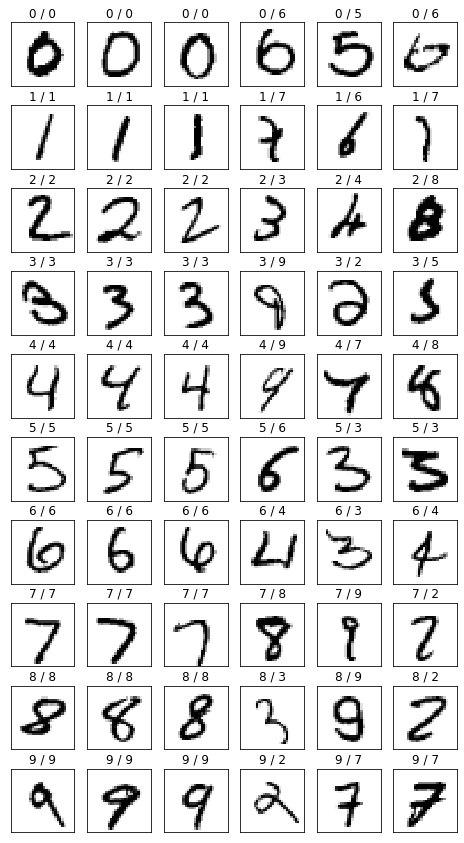

In [9]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if (prediction != i):
            continue
        if ((c < 4 and i == actual) or (c >= 4 and i != actual)):
            subplot = fig.add_subplot(10, 6, i * 6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d'%(prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if (c > 6):
                break